Hypothèses testées et résultats :

1. Les femmes sont plus nombreuses à résilier que les hommes<br>
✅ Test du Khi² → p-value ≈ 0 → Nous avons suffisamment d’évidence pour rejeter H₀<br>
📌 Le sexe est un facteur significativement associé à la résiliation.

2. Les clients ayant 1 seul produit résilient plus que ceux en ayant 2<br>
✅ Test du Khi² → p-value ≈ 0 → H₀ rejetée<br>
📌 Posséder peu de produits est corrélé à un taux de churn plus élevé.

3. Les clients allemands résilient plus que les Français et Espagnols<br>
✅ Test du Khi² sur la variable Geography → p-value ≈ 0 → H₀ rejetée<br>
📌 Le pays d’origine influence significativement le comportement de résiliation.

4. Les clients actifs résilient plus que les clients inactifs<br>
✅ Test du Khi² → p-value ≈ 0 → H₀ rejetée<br>
📌 À l’inverse de ce qu’on pourrait penser, l'activité est liée à un taux de churn plus élevé dans cet échantillon.

5. Les clients avec un solde élevé résilient plus souvent<br>
✅ Test de student à 2 échantillons indépendants → p-value ≈ 0 → H₀ rejetée<br>
📌 Un solde plus élevé est associé à un risque de résiliation accru.

6. Les clients âgés de 44 ans et plus résilient plus souvent<br>
✅ Test de student à 2 échantillons indépendants → p-value ≈ 0 → H₀ rejetée<br>
📌 L’âge est un facteur significativement lié à la résiliation.

In [23]:
### Import des packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency, ttest_ind

In [2]:
df_train = pd.read_csv("train_data.csv")
df_train

,ID,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,37765,15794860,Ch'eng,627,France,Male,28.0,7,131694.04,1,1.0,1.0,161205.61,0
1,130453,15728005,Hargreaves,597,France,Male,34.0,2,0.00,2,0.0,1.0,181419.29,0
2,77297,15686810,Ts'ui,724,France,Male,39.0,7,0.00,2,1.0,1.0,100862.54,0
3,40858,15760244,Trevisano,663,Germany,Female,56.0,5,118577.24,3,1.0,0.0,61164.45,1
4,19804,15810563,French,627,France,Female,33.0,5,0.00,2,1.0,1.0,103737.82,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143574,97639,15759915,Onwumelu,559,Germany,Male,45.0,3,111634.29,1,1.0,1.0,103349.74,0
143575,95939,15769974,Shih,597,Germany,Male,41.0,10,119182.73,1,0.0,0.0,121299.14,0
143576,152315,15592028,Hsiao,576,Spain,Male,31.0,6,127299.56,1,1.0,1.0,57569.89,0
143577,117952,15804009,Ch'ang,751,France,Female,27.0,4,90721.11,1,0.0,0.0,84496.78,0


# 1. Les femmes sont plus nombreuses à résilier que les hommes

Test chi2 contingency

HO : "Le nombre de clients qui résilient (Exited) et le sexe (Gender) sont 2 variables indépendantes l'une de l'autre"

In [3]:
contingency_table = pd.crosstab(df_train["Exited"], df_train["Gender"])
contingency_table

Gender,Female,Male
Exited,,
0,45038,68091
1,17575,12875


In [4]:
chi2_contingency(contingency_table)

Chi2ContingencyResult(statistic=np.float64(3127.515772767467), pvalue=np.float64(0.0), dof=1, expected_freq=array([[49334.13714401, 63794.86285599],
       [13278.86285599, 17171.13714401]]))

In [5]:
pd.DataFrame(
    chi2_contingency(contingency_table).expected_freq,
    columns=df_train["Gender"].sort_values().unique(),
    index=df_train["Exited"].sort_values().unique(),
).round()

,Female,Male
0,49334.0,63795.0
1,13279.0,17171.0


<Axes: xlabel='Gender', ylabel='Exited'>

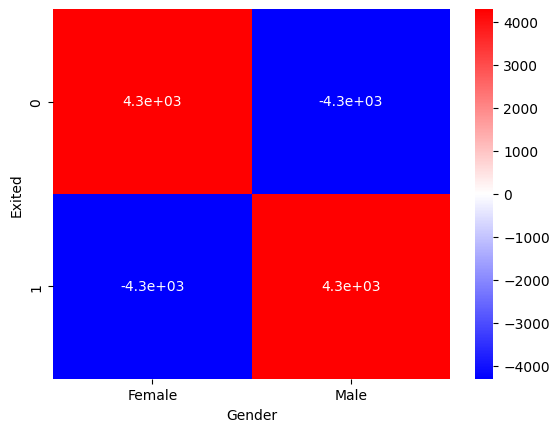

In [6]:
expected = chi2_contingency(contingency_table).expected_freq

expected_df = pd.DataFrame(expected, 
                           index=contingency_table.index, 
                           columns=contingency_table.columns
                           ).round()

diff = expected_df - contingency_table


sns.heatmap(diff, annot=True, cmap="bwr")

In [7]:
print("HO : 'Le nombre de clients qui résilient (Exited) et le sexe (Gender) sont 2 variables indépendantes l'une de l'autre'")

alpha = 0.02
p_value = chi2_contingency(contingency_table).pvalue

if p_value < alpha:
    print("Nous avons suffisament d'évidence pour rejeter H0")
else:
    print("Nous n'avons pas suffisament d'évidence pour rejeter H0")

HO : 'Le nombre de clients qui résilient (Exited) et le sexe (Gender) sont 2 variables indépendantes l'une de l'autre'
Nous avons suffisament d'évidence pour rejeter H0


👉 Le test du χ² (p-value ≈ 0) rejette l’hypothèse d’indépendance entre le sexe et la résiliation.

On observe une **sur-représentation des femmes** parmi les clients qui résilient, et une **sur-représentation des hommes** parmi ceux qui restent.

Ainsi, **le genre a une influence significative sur le churn**.


# 2. Les clients ayant 1 produit sont plus nombreuses à résilier que ceux en ayant 2

Test chi2 contingency

H0 : "Le nombre de produit détenu par les clients (NumOfProducts) et le nombre de résiliation (Exited) <br>
sont 2 variables indépendantes l'une de l'autre."

In [8]:
contingency_table = pd.crosstab(df_train["Exited"], df_train["NumOfProducts"])
contingency_table

NumOfProducts,1,2,3,4
Exited,,,,
0,43905,68879,292,53
1,23459,4422,2218,351


In [9]:
chi2_contingency(contingency_table)

Chi2ContingencyResult(statistic=np.float64(25393.715822144062), pvalue=np.float64(0.0), dof=3, expected_freq=array([[53077.55281761, 57755.44354676,  1977.6832963 ,   318.32033933],
       [14286.44718239, 15545.55645324,   532.3167037 ,    85.67966067]]))

In [10]:
expected = chi2_contingency(contingency_table).expected_freq

pd.DataFrame(
    expected,
    columns=contingency_table.columns,
    index=contingency_table.index,
    ).round()

NumOfProducts,1,2,3,4
Exited,,,,
0,53078.0,57755.0,1978.0,318.0
1,14286.0,15546.0,532.0,86.0


<Axes: xlabel='NumOfProducts', ylabel='Exited'>

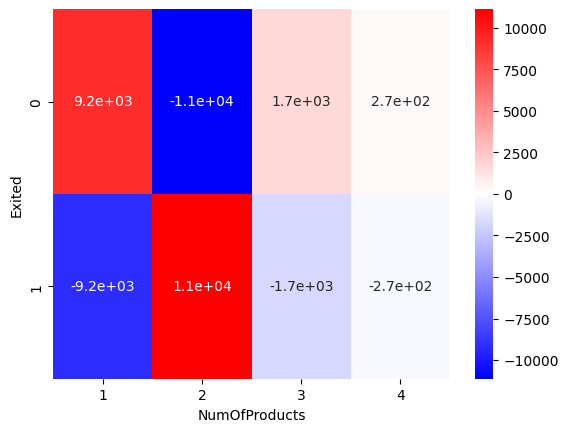

In [11]:
diff = expected - contingency_table

sns.heatmap(diff, annot=True, cmap="bwr")

In [12]:
print("H0 : 'Le nombre de clients qui résilient (Exited) et le nombre de produits souscrits (NumOfProducts) sont 2 variables indépendantes l'une de l'autre'")

alpha = 0.02
p_value = chi2_contingency(contingency_table).pvalue

if p_value < alpha:
    print("Nous avons suffisament d'évidence pour rejeter H0")
else:
    print("Nous n'avons pas suffisament d'évidence pour rejeter H0")

H0 : 'Le nombre de clients qui résilient (Exited) et le nombre de produits souscrits (NumOfProducts) sont 2 variables indépendantes l'une de l'autre'
Nous avons suffisament d'évidence pour rejeter H0


# 3. Les clients allemands sont plus nombreux à résilier que les clients Français et Espagnol

Test chi2 contingency

H0 : "Le nombre de clients ayant résilié (Exited) et le pays d'origine (Geography)<br> 
sont 2 variables indépendantes l'une de l'autre." 

In [13]:
contingency_table = pd.crosstab(df_train["Exited"], df_train["Geography"])
contingency_table

Geography,France,Germany,Spain
Exited,,,
0,68338,18657,26134
1,13548,11448,5454


In [14]:
chi2_contingency(contingency_table)

Chi2ContingencyResult(statistic=np.float64(6455.578335753235), pvalue=np.float64(0.0), dof=2, expected_freq=array([[64519.75075742, 23720.38073117, 24888.86851141],
       [17366.24924258,  6384.61926883,  6699.13148859]]))

In [15]:
pd.DataFrame(
    chi2_contingency(contingency_table).expected_freq,
    columns=contingency_table.columns,
    index=contingency_table.index,
).round()

Geography,France,Germany,Spain
Exited,,,
0,64520.0,23720.0,24889.0
1,17366.0,6385.0,6699.0


<Axes: xlabel='Geography', ylabel='Exited'>

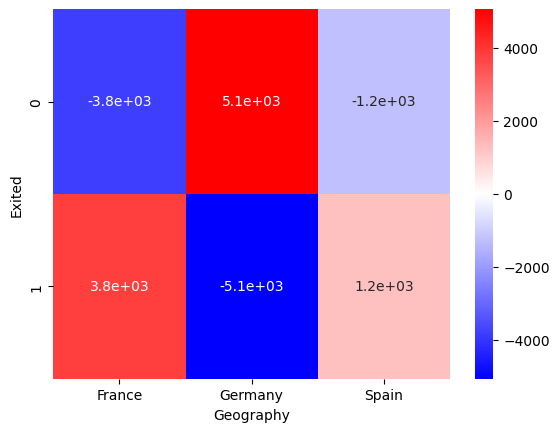

In [16]:
expected = chi2_contingency(contingency_table).expected_freq

diff = pd.DataFrame(
    chi2_contingency(contingency_table).expected_freq,
    columns=contingency_table.columns,
    index=contingency_table.index,
).round() - contingency_table

sns.heatmap(diff, annot=True, cmap="bwr")

In [17]:
print("H0 : 'Le nombre de clients qui résilient (Exited) et la géographie (Geography) sont 2 variables indépendantes l'une de l'autre'")

alpha = 0.02
p_value = chi2_contingency(contingency_table).pvalue

if p_value < alpha:
    print("Nous avons suffisament d'évidence pour rejeter H0")
else:
    print("Nous n'avons pas suffisament d'évidence pour rejeter H0")

H0 : 'Le nombre de clients qui résilient (Exited) et la géographie (Geography) sont 2 variables indépendantes l'une de l'autre'
Nous avons suffisament d'évidence pour rejeter H0


# 4. Les clients actifs sont plus nombreux à résilier que les clients inactif

Test chi2 contingency

H0 : "Le nombre de clients actif (IsActiveMember) et le nombre de clients qui résilient (Exited) sont 2 variables<br> 
indépendantes l'une de l'autre"

In [18]:
contingency_table = pd.crosstab(df_train["Exited"], df_train["IsActiveMember"])
contingency_table

IsActiveMember,0.0,1.0
Exited,,
0,50742,62387
1,21507,8943


In [19]:
chi2_contingency(contingency_table)

Chi2ContingencyResult(statistic=np.float64(6376.075432276614), pvalue=np.float64(0.0), dof=1, expected_freq=array([[56926.5499899, 56202.4500101],
       [15322.4500101, 15127.5499899]]))

In [20]:
expected = chi2_contingency(contingency_table).expected_freq

pd.DataFrame(
    expected,
    columns=contingency_table.columns,
    index=contingency_table.index,
).round()

IsActiveMember,0.0,1.0
Exited,,
0,56927.0,56202.0
1,15322.0,15128.0


In [21]:
print("H0 : 'Le nombre de clients qui résilient (Exited) et le statut d'adhésion (IsActiveMember) sont 2 variables indépendantes l'une de l'autre'")

alpha = 0.02
p_value = chi2_contingency(contingency_table).pvalue

if p_value < alpha:
    print("Nous avons suffisament d'évidence pour rejeter H0")
else:
    print("Nous n'avons pas suffisament d'évidence pour rejeter H0")

H0 : 'Le nombre de clients qui résilient (Exited) et le statut d'adhésion (IsActiveMember) sont 2 variables indépendantes l'une de l'autre'
Nous avons suffisament d'évidence pour rejeter H0


# 5. Les clients ayant un solde élevée sont plus nombreux à résilier (Attention avec médiane à 0 FR et ES)

Test de student

H0 : "Les clients qui ont résilié ont en moyenne un solde égal aux autres." 

In [22]:
df_train.groupby("Exited")["Balance"].describe()

,count,mean,std,min,25%,50%,75%,max
Exited,,,,,,,,
0,113129.0,51274.230558,62196.885812,0.0,0.0,0.00,116811.12,250898.09
1,30450.0,71358.363247,62606.860862,0.0,0.0,98959.19,125521.18,238387.56


- Les variances sont sensiblement identiques
- Les données sont indépendantes
- Il y a plus de 30 lignes de données pour chaque groupe (TCL)

-"Les données sont indépendantes car chaque observation (client) est distincte et ne dépend pas des autres. Il n'y a pas de duplication ou de lien entre les clients dans le dataset."

In [25]:
df_exited = df_train.query("Exited == 1")
df_NoExited = df_train.query("Exited == 0")

ttest_ind(df_exited["Balance"], df_NoExited["Balance"])

TtestResult(statistic=np.float64(49.94722364010174), pvalue=np.float64(0.0), df=np.float64(143577.0))

In [28]:
print("H0 : 'Les clients qui ont résilié ont un solde moyen identique à celui des clients qui n’ont pas résilié.'")

alpha = 0.02
p_value = ttest_ind(df_exited["Balance"], df_NoExited["Balance"]).pvalue

if p_value < alpha:
    print("Nous avons suffisament d'évidence pour rejeter H0")
else:
    print("Nous n'avons pas suffisament d'évidence pour rejeter H0")

H0 : 'Les clients qui ont résilié ont un solde moyen identique à celui des clients qui n’ont pas résilié.'
Nous avons suffisament d'évidence pour rejeter H0


# 6. Les clients de 44 ans et plus sont plus nombreux à résilier

Test de student

H0 : "Les clients qui résilient ont le même âge moyen que ceux qui ne résilient pas."

In [29]:
df_train.groupby("Exited")["Age"].describe()

,count,mean,std,min,25%,50%,75%,max
Exited,,,,,,,,
0,113129.0,36.583765,8.166737,18.0,31.0,36.0,40.0,92.0
1,30450.0,43.942890,8.981339,18.0,38.0,44.0,50.0,92.0


In [30]:
df_exited = df_train.query("Exited == 1")
df_NoExited = df_train.query("Exited == 0")

ttest_ind(df_exited["Age"], df_NoExited["Age"])

TtestResult(statistic=np.float64(136.5764217714973), pvalue=np.float64(0.0), df=np.float64(143577.0))

In [31]:
print("H0 : 'Les clients qui résilient ont le même âge moyen que ceux qui ne résilient pas.'")

alpha = 0.02
p_value = ttest_ind(df_exited["Age"], df_NoExited["Age"]).pvalue

if p_value < alpha:
    print("Nous avons suffisament d'évidence pour rejeter H0")
else:
    print("Nous n'avons pas suffisament d'évidence pour rejeter H0")

H0 : 'Les clients qui résilient ont le même âge moyen que ceux qui ne résilient pas.'
Nous avons suffisament d'évidence pour rejeter H0
